# Projeto de Análise de Performance no YouTube

## Motivação

Entender o que faz um vídeo performar bem no YouTube é essencial para criadores de conteúdo que desejam crescer suas audiências, melhorar engajamento e monetização. Ao analisar dados históricos dos vídeos, é possível identificar padrões e fatores que influenciam visualizações, duração média de exibição e taxa de cliques.

## Objetivos

Este projeto tem como principal objetivo realizar uma análise de dados sobre a performance de vídeos em um canal do YouTube, utilizando técnicas de análise exploratória e visualização de dados para gerar insights que orientem decisões estratégicas.

- Investigar os fatores que influenciam o desempenho dos vídeos

- Identificar padrões

- Descobrir quais temas geram maior engajamento

## Etapas do Projeto

- Carregamento e análise inicial dos dados: Inspeção do dataset exportado do YouTube Studio

- Limpeza e tratamento dos dados: Conversão de colunas, tratamento de valores nulos, padronizações

- Engenharia de atributos: Criação de novas variáveis

- Análise exploratória (EDA): Avaliação estatística e identificação de tendências e outliers

- Visualização com gráficos: Criação de barplots, scatterplots e wordclouds para facilitar a interpretação dos dados

- Geração de insights: Com base nas análises, identificar ações que possam melhorar a performance do canal



---

# Dicionário de Dados - YouTube Analytics

## Descrição Geral

Este dataset contém dados de análise de performance de vídeos de um canal do YouTube, focado em conteúdo de Counter-Strike 2 (CS2), incluindo tutoriais de granadas e smokes para diferentes mapas.

## Estrutura dos Dados

### Informações Gerais

- **Fonte**: YouTube Analytics
- **Período**: 2013-2025
- **Número de registros**: 11 vídeos
- **Formato**: CSV

---

## Variáveis

| Variável | Tipo | Descrição | Exemplo | Observações |
|----------|------|-----------|---------|-------------|
| **Content** | String | ID único do vídeo no YouTube | `PU50erzKEjk` | Identificador único gerado pelo YouTube |
| **Video title** | String | Título do vídeo | `CS2 - Smokes Anubis` | Título público do vídeo |
| **Video publish time** | String | Data de publicação | `Feb 25, 2025` | Formato: MMM DD, YYYY |
| **Duration** | Integer | Duração do vídeo em segundos | `257` | Duração total do vídeo |
| **Average view duration** | String | Tempo médio de visualização | `0:00:42` | Formato: H:MM:SS |
| **Unique viewers** | Integer | Número de visualizadores únicos | - | Dados não disponíveis no dataset |
| **Stayed to watch (%)** | Float | Percentual de retenção | - | Dados não disponíveis no dataset |
| **Average views per viewer** | Float | Média de visualizações por pessoa | - | Dados não disponíveis no dataset |
| **New viewers** | Integer | Novos visualizadores | - | Dados não disponíveis no dataset |
| **Returning viewers** | Integer | Visualizadores recorrentes | - | Dados não disponíveis no dataset |
| **Views** | Integer | Total de visualizações | `52` | Número total de views |
| **Watch time (hours)** | Float | Tempo total assistido | `0.6107` | Soma de todo tempo assistido |
| **Subscribers** | Integer | Inscritos ganhos | `2` | Novos inscritos através do vídeo |
| **Impressions** | Integer | Impressões do vídeo | `1572` | Quantas vezes o vídeo foi mostrado |
| **Impressions click-through rate (%)** | Float | Taxa de cliques nas impressões | `1.15` | Percentual de cliques sobre impressões |

---

## Observações sobre os Dados

### Valores Ausentes

- Várias colunas (`Unique viewers`, `Stayed to watch (%)`, `Average views per viewer`, `New viewers`, `Returning viewers`) não possuem dados disponíveis
- Primeira linha contém dados agregados ("Total")

### Tipos de Conteúdo

- **Tutoriais de Smokes**: Vídeos ensinando granadas de fumaça para mapas específicos
- **Gameplay**: Alguns vídeos de gameplay antigos

### Período dos Dados

- Vídeos mais antigos: 2013-2015
- Vídeos mais recentes: 2022-2025
- Maioria do conteúdo focado em CS2 (versão atual)

---

## Métricas Principais

### Performance

- **Views**: Indicador principal de alcance
- **Watch time**: Tempo total de engajamento
- **Average view duration**: Qualidade do conteúdo
- **Impressions CTR**: Eficácia da thumbnail/título

### Crescimento

- **Subscribers**: Crescimento do canal
- **Impressions**: Alcance potencial

---

## Considerações para Análise

1. **Dados Incompletos**: Muitas colunas importantes estão vazias
2. **Primeira Linha**: Contém dados agregados que podem precisar ser tratados separadamente
3. **Formato de Tempo**: Converter durações para formato consistente (segundos)
4. **Datas**: Padronizar formato de datas para análise temporal
5. **Outliers**: Verificar vídeos muito antigos que podem distorcer análises

---

## Possíveis Análises

- Evolução temporal do canal
- Relação entre duração e retenção
- Eficácia de títulos/thumbnails (CTR)


---

In [485]:
#fazendo os imports necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

#Visualizar o dataframe com todas as colunas e linhas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Usar o float_format para decidir quantas casas decimais visualizar e ignorar avisos
pd.set_option("display.float_format", "{:.2f}".format)
warnings.filterwarnings("ignore")


In [486]:
caminho = 'dados/'

---

# Análise Exploratória

In [487]:
df_original = pd.read_csv(caminho + "Table data.csv")

df = df_original.copy()

In [488]:
df.head(10)  # Display the first few rows of dataset

,Content,Video title,Video publish time,Duration,Average view duration,Unique viewers,Stayed to watch (%),Average views per viewer,New viewers,Returning viewers,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,NaN,0:00:45,0.00,0.00,0.00,0.00,0.00,167,2.13,4,9202,0.75
1,PU50erzKEjk,CS2 - Smokes Anubis,"Feb 25, 2025",257.00,0:00:42,NaN,NaN,NaN,NaN,NaN,52,0.61,2,1572,1.15
2,bvWgFixX4BQ,Smokes BOMB B - ANUBIS - ATUALIZADO,"Mar 20, 2025",83.00,0:00:35,NaN,NaN,NaN,NaN,NaN,38,0.38,0,3717,0.59
3,Gc2SMmzzmUs,CS2 - Cache,"Mar 3, 2025",191.00,0:00:40,NaN,NaN,NaN,NaN,NaN,36,0.40,0,2083,0.96
4,bXYxJcWGZR0,CS2 - SMOKES Mirage,"Mar 21, 2025",131.00,0:00:33,NaN,NaN,NaN,NaN,NaN,20,0.18,0,1750,0.40
5,L_R7MVHWOkM,Tentativa1,"Nov 26, 2015",55.00,0:01:21,NaN,NaN,NaN,NaN,NaN,2,0.05,0,4,25.00
6,k8lTs7CXJL0,Smokes Anubis,"Nov 22, 2022",287.00,0:02:28,NaN,NaN,NaN,NaN,NaN,5,0.21,1,13,0.00
7,HChO55orsyk,THE_WolF_BR - PDW Streak,"Oct 16, 2013",70.00,0:01:09,NaN,NaN,NaN,NaN,NaN,1,0.02,0,4,25.00
8,NEQhOBuid_k,Algumas Granadas no Mapa da Mirage!,"Dec 7, 2022",353.00,0:06:02,NaN,NaN,NaN,NaN,NaN,1,0.10,0,16,0.00
9,kzU-Mdz2pls,Algumas Granadas no Mapa da Nuke!,"Dec 8, 2022",240.00,0:01:41,NaN,NaN,NaN,NaN,NaN,2,0.06,0,16,0.00


In [489]:
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas." + "\n")

df.info(verbose=True)

O dataset contém 11 linhas e 15 colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             11 non-null     object 
 1   Video title                         10 non-null     object 
 2   Video publish time                  10 non-null     object 
 3   Duration                            10 non-null     float64
 4   Average view duration               11 non-null     object 
 5   Unique viewers                      1 non-null      float64
 6   Stayed to watch (%)                 1 non-null      float64
 7   Average views per viewer            1 non-null      float64
 8   New viewers                         1 non-null      float64
 9   Returning viewers                   1 non-null      float64
 10  Views                               11 non-null     int64  
 11  Watch

Verificamos algumas colunas com muitos valores vazios

In [490]:
df.dtypes

Content                                object
Video title                            object
Video publish time                     object
Duration                              float64
Average view duration                  object
Unique viewers                        float64
Stayed to watch (%)                   float64
Average views per viewer              float64
New viewers                           float64
Returning viewers                     float64
Views                                   int64
Watch time (hours)                    float64
Subscribers                             int64
Impressions                             int64
Impressions click-through rate (%)    float64
dtype: object

Vamos depois otimizar os tipos de cada coluna deste dataset

In [491]:
# Verificar a quantidade de valores únicos de cada coluna ou de colunas específicas
df.nunique() 

Content                               11
Video title                           10
Video publish time                     9
Duration                              10
Average view duration                 11
Unique viewers                         1
Stayed to watch (%)                    1
Average views per viewer               1
New viewers                            1
Returning viewers                      1
Views                                  8
Watch time (hours)                    11
Subscribers                            4
Impressions                            8
Impressions click-through rate (%)     7
dtype: int64

Algumas colunas apresentam um valor único, ou seja, não há necessidade de mantê-los.

---

# Tratamento dos Dados

#### Vamos remover a primeira linha do arquivo pois mostra o Total de cada coluna

In [492]:
#removendo a primeira linha do dataset
df = df.drop(index=0) 

## Otimizando as colunas

In [493]:
#mudando a coluna do Titulo do Vídeo para o tipo category
colunas_categoricas = ["Video title"]
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype("category")
    

#mudando a coluna do Data de publicação do Vídeo para o tipo datetime
       
colunas_data = ["Video publish time"]
for coluna in colunas_data:
    df[coluna] = pd.to_datetime(df[coluna])

# transformar a coluna Duration em minutos e segundos
def seconds_to_mmss_float(seconds):
    minutes = int(seconds) // 60
    sec = int(seconds) % 60
    return float(f"{minutes}.{sec:02d}")

df["Duration M.S"] = df["Duration"].apply(seconds_to_mmss_float)


#converter a coluna Average view duration em timedelta
df["Average view duration M.S"] = pd.to_timedelta(df['Average view duration'])

#extrair minutos e segundos da coluna Average view duration M.S
df['Minutes'] = df['Average view duration M.S'].dt.components['minutes']
df['Seconds'] = df['Average view duration M.S'].dt.components['seconds']

#combinar minutos e segundos em uma coluna de timedelta
df['Average view duration M.S'] = df['Minutes'] + (df['Seconds'] / 100)

#otimizando as colunas do tipo float
colunas_float = df.select_dtypes(include="float64").columns
for coluna in colunas_float:
    df[coluna] = pd.to_numeric(df[coluna], downcast='float')

#otimizando as colunas do tipo int
colunas_int = df.select_dtypes(include="int64").columns
for coluna in colunas_int:
    df[coluna] = pd.to_numeric(df[coluna], downcast='integer')


In [494]:
#colunas otimizadas
df.dtypes

Content                                       object
Video title                                 category
Video publish time                    datetime64[ns]
Duration                                     float32
Average view duration                         object
Unique viewers                               float32
Stayed to watch (%)                          float32
Average views per viewer                     float32
New viewers                                  float32
Returning viewers                            float32
Views                                           int8
Watch time (hours)                           float32
Subscribers                                     int8
Impressions                                    int16
Impressions click-through rate (%)           float32
Duration M.S                                 float32
Average view duration M.S                    float32
Minutes                                         int8
Seconds                                       

#### Vamos remover as colunas com muitos valores vazios ou sem muito significado

In [495]:
df = df.drop(["Content", "Duration", "Unique viewers", "Stayed to watch (%)", "Average views per viewer", "New viewers", "Returning viewers", "Watch time (hours)", "Average view duration", "Minutes", "Seconds"], axis=1)  # Remover as colunas que não são necessárias para a análise

In [496]:
df.sample(10)

,Video title,Video publish time,Views,Subscribers,Impressions,Impressions click-through rate (%),Duration M.S,Average view duration M.S
3,CS2 - Cache,2025-03-03,36,0,2083,0.96,3.11,0.40
5,Tentativa1,2015-11-26,2,0,4,25.00,0.55,1.21
2,Smokes BOMB B - ANUBIS - ATUALIZADO,2025-03-20,38,0,3717,0.59,1.23,0.35
6,Smokes Anubis,2022-11-22,5,1,13,0.00,4.47,2.28
7,THE_WolF_BR - PDW Streak,2013-10-16,1,0,4,25.00,1.10,1.09
1,CS2 - Smokes Anubis,2025-02-25,52,2,1572,1.15,4.17,0.42
10,Granadas no mapa da Cache!,2022-12-07,2,0,13,0.00,4.07,2.27
4,CS2 - SMOKES Mirage,2025-03-21,20,0,1750,0.40,2.11,0.33
9,Algumas Granadas no Mapa da Nuke!,2022-12-08,2,0,16,0.00,4.00,1.41
8,Algumas Granadas no Mapa da Mirage!,2022-12-07,1,0,16,0.00,5.53,6.02


Verificamos valores bem esparços, onde claramente alguns videos estao muito mais populares do que outros

 Videos mais populares:

**CS2 - Cache**

**CS2 - Smokes Anubis**

**Smokes BOMB B - ANUBIS - ATUALIZADO**

**CS2 - SMOKES Mirage**

-----------------------------------------------
Outliers em Impressions click-through rate (%):
Poucas views mas 25% de CTR

**Tentativa1 e THE_WolF_BR - PDW Streak**

In [497]:
df.describe(include='all')

,Video title,Video publish time,Views,Subscribers,Impressions,Impressions click-through rate (%),Duration M.S,Average view duration M.S
count,10,10,10.00,10.00,10.00,10.00,10.00,10.00
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Algumas Granadas no Mapa da Mirage!,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2022-03-19 14:24:00,15.90,0.30,918.80,5.31,3.03,1.58
min,NaN,2013-10-16 00:00:00,1.00,0.00,4.00,0.00,0.55,0.33
25%,NaN,2022-11-25 18:00:00,2.00,0.00,13.00,0.00,1.45,0.41
50%,NaN,2022-12-07 12:00:00,3.50,0.00,16.00,0.49,3.55,1.15
75%,NaN,2025-03-01 12:00:00,32.00,0.00,1705.50,1.10,4.15,2.05
max,NaN,2025-03-21 00:00:00,52.00,2.00,3717.00,25.00,5.53,6.02


In [498]:
# Calcular duração em minutos, segundos
max_duration = df["Duration M.S"].max()
min_duration = df["Duration M.S"].min()
median_duration = df["Duration M.S"].median()

minutos_max_duration = int(max_duration)
segundos_max_duration = int(round((max_duration - minutos_max_duration) * 100))

minutos_min_duration = int(min_duration)
segundos_min_duration = int(round((min_duration - minutos_min_duration) * 100))

minutos_median_duration = int(median_duration)
segundos_median_duration = int(round((median_duration - minutos_median_duration) * 100))

# Inscritos ganhos
subscribers_gained = df["Subscribers"].max()

# Views
max_views = df["Views"].max()
min_views = df["Views"].min()
median_views = df["Views"].median()

# Impressões
max_impressions = df["Impressions"].max()
min_impressions = df["Impressions"].min()
median_impressions = df["Impressions"].median()

# Taxa de cliques (CTR)
max_ctr = df["Impressions click-through rate (%)"].max()
min_ctr = df["Impressions click-through rate (%)"].min()
median_ctr = df["Impressions click-through rate (%)"].median()

# Datas de publicação
inicio = df["Video publish time"].dt.date.min()
fim = df["Video publish time"].dt.date.max()

# Resumo formatado
print("Período dos dados: de", inicio, "até", fim)
print("")
print(f"Vídeo com maior duração: {minutos_max_duration} minutos e" + f" {segundos_max_duration} segundos")
print(f"Vídeo com menor duração: {minutos_min_duration} minutos e" + f" {segundos_min_duration} segundos")
print(f"Duração mediana dos vídeos: {minutos_median_duration} minutos e" + f" {segundos_median_duration} segundos")
print("")
print("Vídeo com mais inscritos ganhos:", df.loc[df["Subscribers"].idxmax(), "Video title"],
      f"({subscribers_gained} inscritos)")
print("")
print("Vídeo com mais visualizações:", df.loc[df["Views"].idxmax(), "Video title"], 
      f"({max_views} visualizações)")
print("Vídeo com menos visualizações:", df.loc[df["Views"].idxmin(), "Video title"], 
      f"({min_views} visualizações)")
print(f"Mediana de Visualizações : {int(median_views)}")
print("")
print("Vídeo mais exibido (impressões):", df.loc[df["Impressions"].idxmax(), "Video title"], 
      f"({max_impressions} impressões)")
print("Vídeo menos exibido (impressões):", df.loc[df["Impressions"].idxmin(), "Video title"], 
      f"({min_impressions} impressões)")
print(f"Mediana de Impressões: {int(median_impressions)}")
print("")
print("Vídeo com maior CTR:", df.loc[df["Impressions click-through rate (%)"].idxmax(), "Video title"], 
      f"({max_ctr:.2f}%)")
print("Vídeo com menor CTR:", df.loc[df["Impressions click-through rate (%)"].idxmin(), "Video title"], 
      f"({min_ctr:.2f}%)")
print(f"CTR mediana: {median_ctr:.2f}%")

Período dos dados: de 2013-10-16 até 2025-03-21

Vídeo com maior duração: 5 minutos e 53 segundos
Vídeo com menor duração: 0 minutos e 55 segundos
Duração mediana dos vídeos: 3 minutos e 55 segundos

Vídeo com mais inscritos ganhos: CS2 - Smokes Anubis (2 inscritos)

Vídeo com mais visualizações: CS2 - Smokes Anubis (52 visualizações)
Vídeo com menos visualizações: THE_WolF_BR - PDW Streak (1 visualizações)
Mediana de Visualizações : 3

Vídeo mais exibido (impressões): Smokes BOMB B - ANUBIS - ATUALIZADO (3717 impressões)
Vídeo menos exibido (impressões): Tentativa1 (4 impressões)
Mediana de Impressões: 16

Vídeo com maior CTR: Tentativa1 (25.00%)
Vídeo com menor CTR: Smokes Anubis (0.00%)
CTR mediana: 0.50%


---

# Visualização com gráficos

In [499]:
# Mesma configuração do seaborn para todos os gráficos
sns.set_theme("talk")
sns.set_palette("viridis")
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (25,5)
s = 200


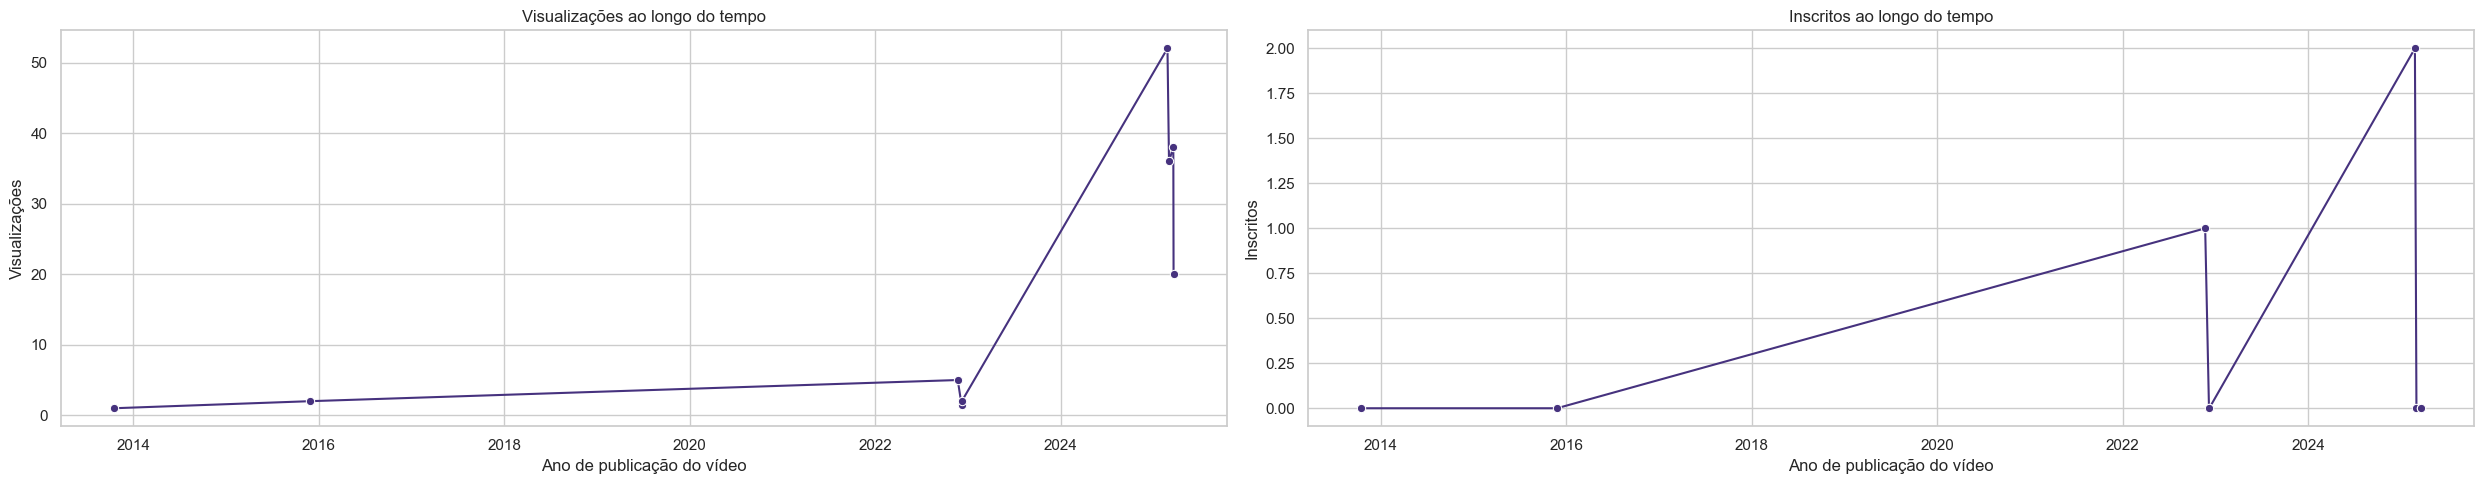

In [500]:
# figuras lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2)

# First plot - Views
sns.lineplot(data=df,
             x="Video publish time",
             y="Views",
             marker='o',
             ax=ax1)
ax1.set_title("Visualizações ao longo do tempo")
ax1.set_xlabel("Ano de publicação do vídeo")
ax1.set_ylabel("Visualizações")

# Second plot - Subscribers
sns.lineplot(data=df,
             x="Video publish time",
             y="Subscribers",
             marker='o',
             ax=ax2)
ax2.set_title("Inscritos ao longo do tempo")  # Fixed title
ax2.set_xlabel("Ano de publicação do vídeo")
ax2.set_ylabel("Inscritos")  # Fixed ylabel

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
fig = ax1.get_figure()
fig.savefig("graficos/Lineplots.png") 


A curva do número de visualizações e do número de inscritos ganhos ao longo do tempo seguem uma curva muito parecida. 

Vídeos tiveram mais sucesso após o ano de 2023 

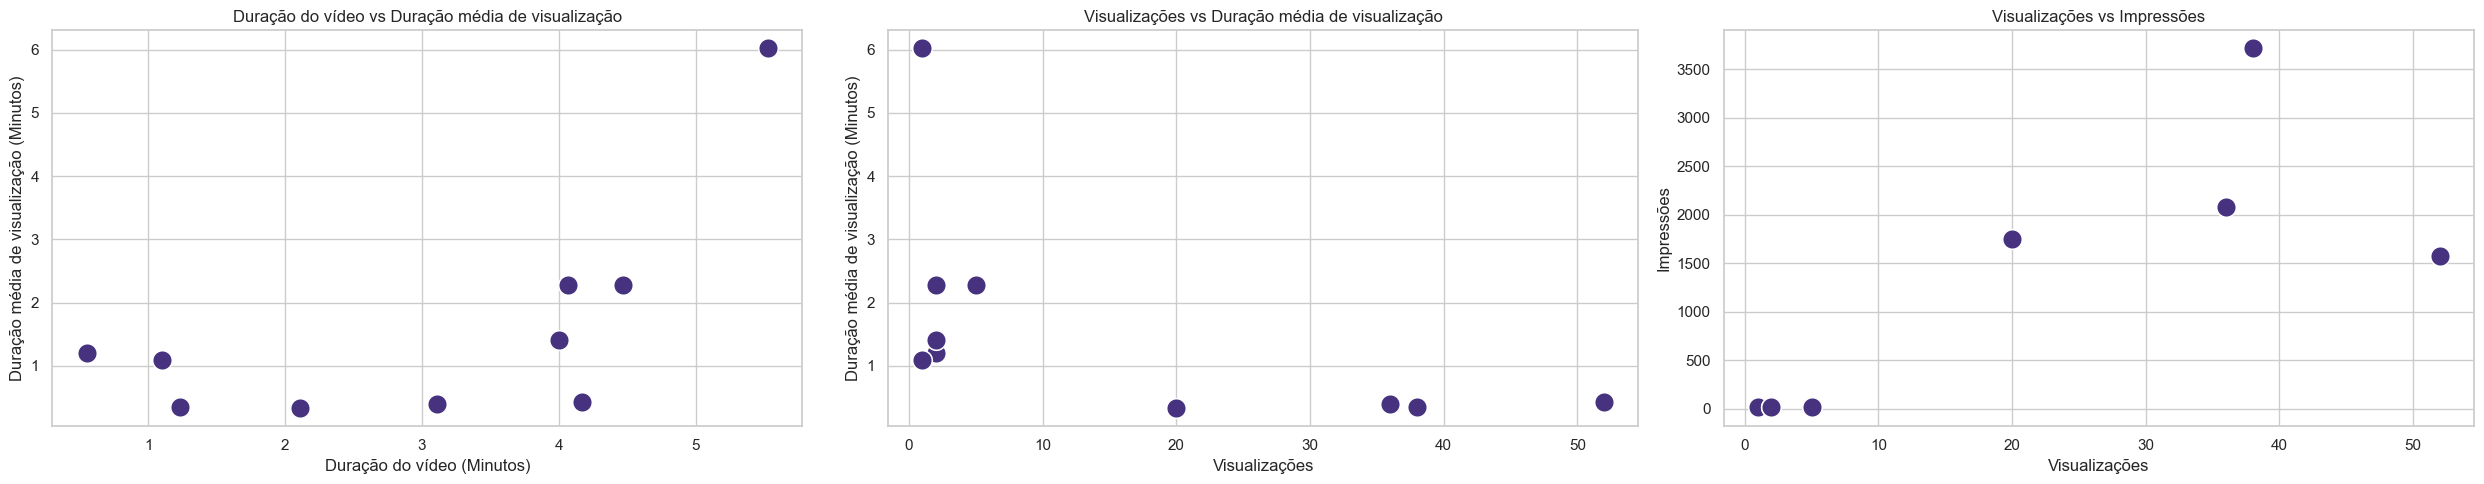

In [501]:
# figuras lado a lado
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

sns.scatterplot(data=df, 
            x="Duration M.S", 
            y="Average view duration M.S",
            s=s,
            ax=ax1)           
ax1.set_title("Duração do vídeo vs Duração média de visualização")
ax1.set_xlabel("Duração do vídeo (Minutos)")
ax1.set_ylabel("Duração média de visualização (Minutos)")


sns.scatterplot(data=df, 
            x="Views", 
            y="Average view duration M.S",
            s=s,
            ax=ax2)           
ax2.set_title("Visualizações vs Duração média de visualização")
ax2.set_xlabel("Visualizações")
ax2.set_ylabel("Duração média de visualização (Minutos)")

sns.scatterplot(data=df, 
            x="Views", 
            y="Impressions",
            s=s,
            ax=ax3)           
ax3.set_title("Visualizações vs Impressões")
ax3.set_xlabel("Visualizações")
ax3.set_ylabel("Impressões")

plt.tight_layout()
plt.show()

fig = ax1.get_figure()
fig.savefig("graficos/Scatterplots.png") 

Vídeos mais longos tendem a ter uma média maior de tempo de visualização.

Assim também como quanto mais pessoas assistem um vídeo, menor o tempo médio de visualização, isso se dá devido ao fato que principalmente neste tipo de video, os usuários tendem a apenas assistir uma parte específica do video, e não a todo o conteúdo.

No terceiro gráfico, vemos novamente que vídeos com mais visualizações, tendem a ter mais impressões.

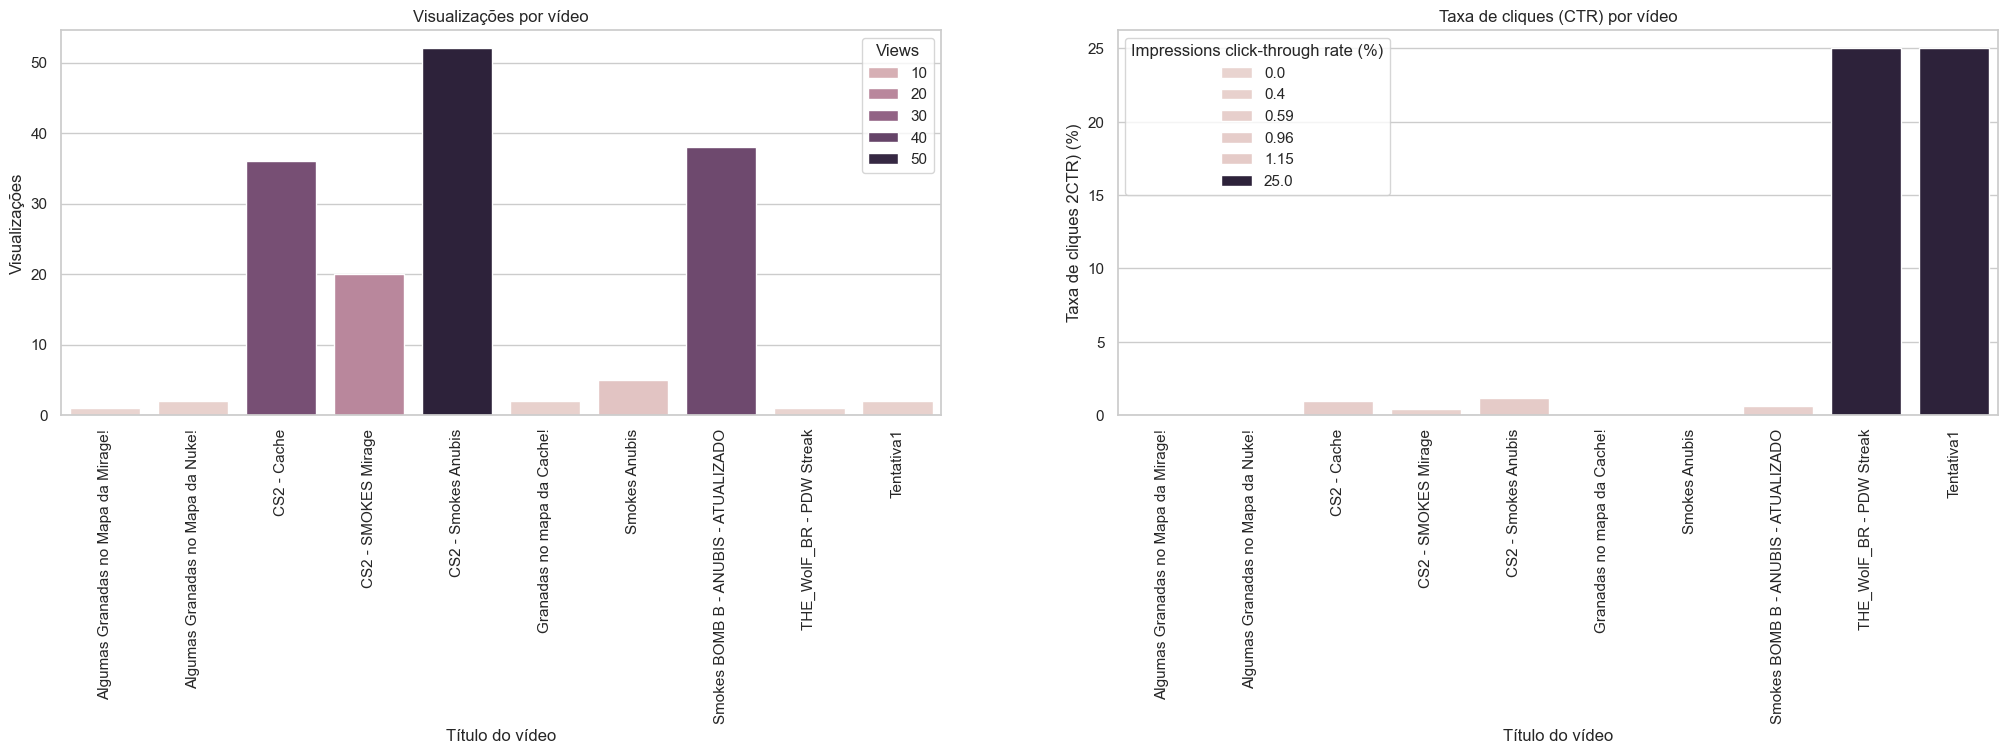

In [502]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(data=df,
            x="Video title",
            y="Views",
            hue="Views",
            ax=ax1)

ax1.set_title("Visualizações por vídeo")
ax1.set_xlabel("Título do vídeo")
ax1.set_ylabel("Visualizações")
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, 
            x="Video title", 
            y="Impressions click-through rate (%)",
            hue="Impressions click-through rate (%)",
            ax=ax2)           
ax2.set_title("Taxa de cliques (CTR) por vídeo")
ax2.set_xlabel("Título do vídeo")
ax2.set_ylabel("Taxa de cliques 2CTR) (%)")
ax2.tick_params(axis='x', rotation=90)


plt.show()

fig = ax1.get_figure()
fig.savefig("graficos/Barplots.png") 



            

Conteúdo focado em CS2 tem melhor engajamento

Títulos com "CS2" e "Smokes" geram mais cliques

Títulos com "Granadas" ao invés de "Smokes"geram menos

Dois dos vídeos com menos visualizações tem as maiores taxas de CTR.

Os vídeos da Anubis no CS2 se saíram muito melhor que no CSGO

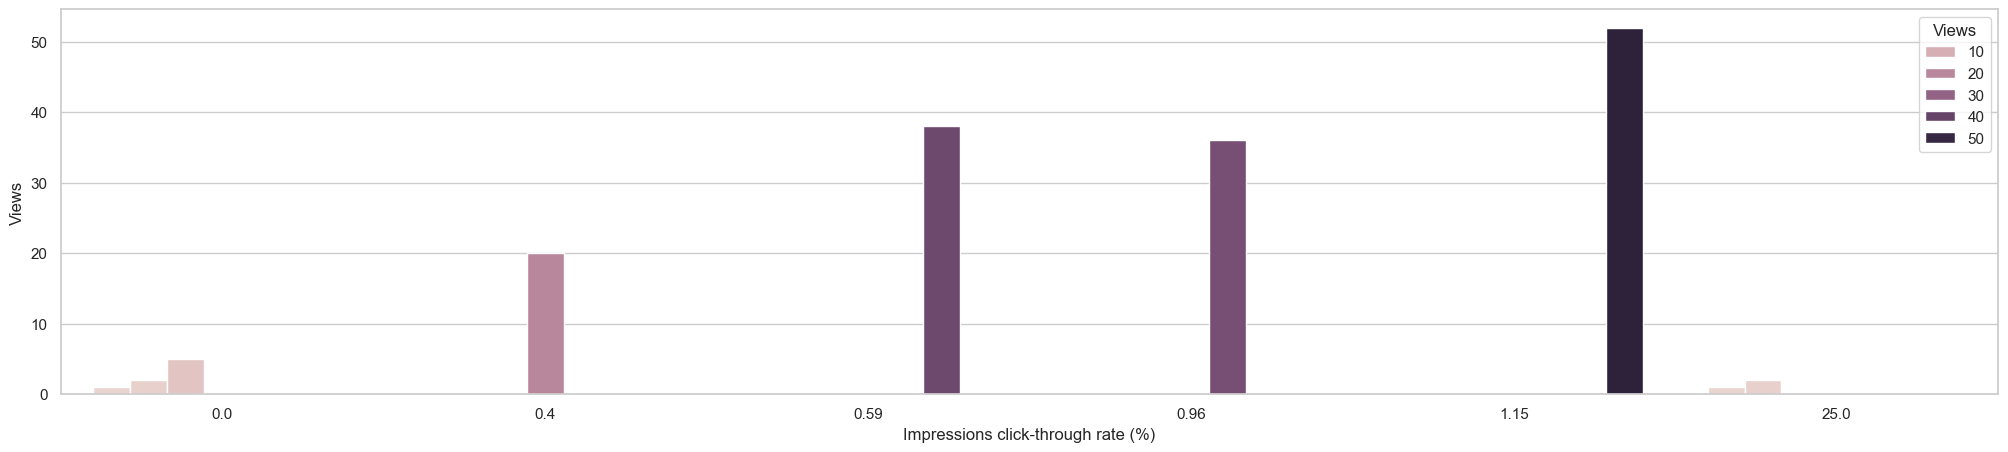

In [503]:
fig1 = sns.barplot(data=df,
            x="Impressions click-through rate (%)",
            y="Views",
            hue="Views")

plt.show()
fig = fig1.get_figure()
fig.savefig("graficos/ViwsXCTR.png") 

Os vídeos com mais visualizações tem um número mais real de CTR, enquanto com os vídeos com pocas visualizações apresentam números que não são representativos

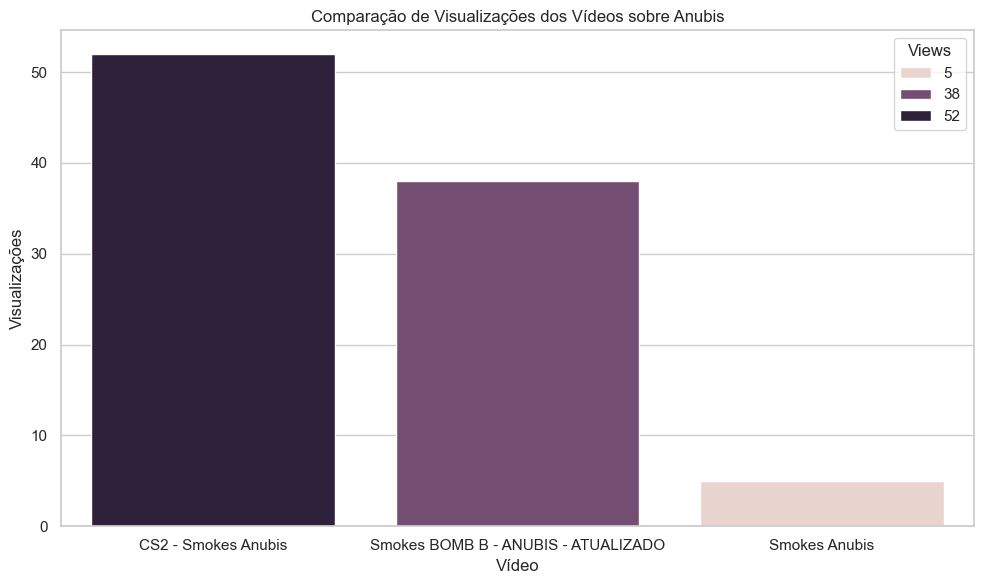

In [504]:
df_filtrado = df[df["Video title"].str.contains("anubis", case=False, na=False)]

df_filtrado = df_filtrado.copy()
df_filtrado["Video title"] = df_filtrado["Video title"].astype(str)

# Criar o barplot
plt.figure(figsize=(10, 6))
fig1 = sns.barplot(
    data=df_filtrado,
    x="Video title",
    y="Views",
    hue="Views"
)

# Ajustes visuais
plt.title("Comparação de Visualizações dos Vídeos sobre Anubis")
plt.xlabel("Vídeo")
plt.ylabel("Visualizações")


# Mostrar e salvar
plt.tight_layout()
plt.show()

fig = fig1.get_figure()
fig.savefig("graficos/AnubisComparison.png")

Vídeos da Anubis do CS2 (CS2 - Smokes Anubis e Smokes BOMB B - ANUBIS - ATUALIZADO) tiveram muito mais visualizações

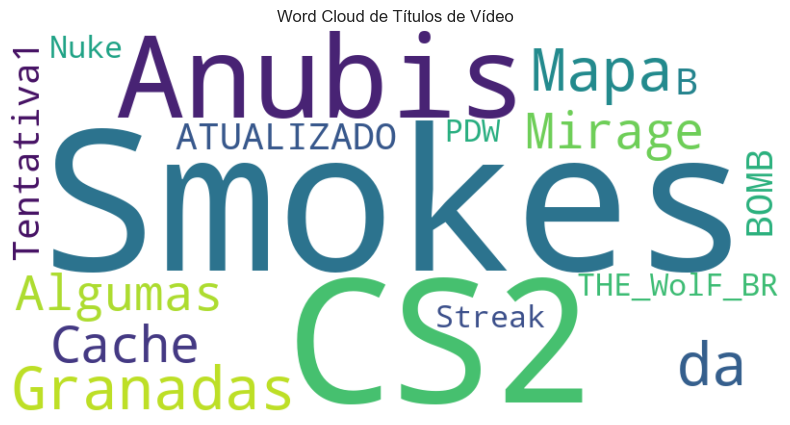

In [505]:
# Junte os títulos em uma única string, removendo valores nulos
text = ' '.join(df['Video title'].dropna().astype(str))


# Cria o objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibe com matplotlib
fig1 =plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud de Títulos de Vídeo")
plt.show()

fig = fig1.get_figure()
fig.savefig("graficos/wordcloud.png")

Aqui podemos ver as palavras que aparecem mais vezes nos títulos dos vídeos.

In [506]:
#salvando o dataset tratado em um novo arquivo csv
dados_tratados = df.to_csv("dados/df_final.csv", index=False)

---

# Análise Descritiva

O que aconteceu?

- Foram analisados vídeos do meu canal do Youtube entre as datas 16/10/2013 até 21/03/2025
- Os vídeos tiveram uma mediana de 3 visualizações
- A mediana do tempo de duração dos vídeos é de 3 minutos e 55 segundos
- Vídeos com palavras como "CS2" e "Smokes" se saíram melhor na maioria das métricas
- Vídeos mais longos tendem a ter uma média maior de tempo de visualização
- Quanto mais pessoas assistem um vídeo, menor o tempo médio de visualização
- Vídeos com mais visualizações, tendem a ter mais impressões
- O número de visualizações e o número de inscritos ganhos ao longo do tempo seguem a mesma tendência
- Vídeos tiveram mais sucesso após o ano de 2023 
- Títulos com "Granadas" ao invés de "Smokes" geram menos visualizações
- Os dois vídeos do Mapa "Anubis" teve o maior número de visualizações no CS2 comparado ao vídeo do CS:GO ("Smokes Anubis")


# Análise Diagnóstica

Por que aconteceu?

- Vídeos com palavras-chave como "CS2" e "Smokes" obtiveram mais visualizações, provavelmente porque o jogo "CS2" lançou recentemente e muitos jogadores procuram vídeos de como fazer "Smokes" no jogo
- Mesmo motivo fez que os vídeos lançados após 2023 tiveram engajamento maior
- Vídeos com mais visualizações tendem a ter um CTR mais real, pois aparecem para um numero maior de pessoas e portanto, têm mais chances de serem clicados
- Quanto mais pessoas assistem um vídeo, menor o tempo médio de visualização, isso se dá devido ao fato que principalmente neste tipo de video, os usuários tendem a apenas assistir uma parte específica do video (uma "Smoke" específica), e não a todo o conteúdo
- A curva do número de visualizações e do número de inscritos ganhos ao longo do tempo seguem uma curva muito parecida pois quanto mais pessoas assistem um vídeo, maior a chance de ganhar inscritos 
- Mapa "Anubis" teve o maior número de visualizações pelo fato de ser um mapa relativamente novo, gerando um interesse maior. Principalmente os vídeos do CS2, que obtiveram um número de visualizações muito maior que a versão do CS:GO

# Análise Preditiva

O que vai acontecer?

- Provavelmente, se continuar postando vídeos com as palavras "CS2" e "Smokes", o canal continuará a crescer
- Mesma coisa para vídeos feitos entre 2023-2025, pois o jogo ainda é relevante e muitas pessoas procuram por este tipo de vídeo, porém, chegará um ponto onde isso não será mais tão relevante porque as pessoas assistiram este tipo de vídeo e já aprenderam o que precisam
- Continuar fazendo vídeos de mapas novos e relevantes poderá gerar um interesse maior nos vídeos

# Análise Prescritiva

O que devemos fazer?

- Postar vídeos com as palavras-chave que dão maior número de visualizações
- Postar vídeos com mapas novos lançados a fim de gerar interesse maior no vídeo pelo fato de muitos jogadores quererem aprender sobre o mapa o mais rápido possível
- Postar enquanto o CS2 estiver relevante